In [4]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}
deposited_threshold_dict = {"38":0.00596,"71":0.00952,"93":0.7,"94":0.7,"234":1,"408":0.045,"415":0.04,"4288":0.0548,"452":0.0172,"490":0.55,"589":0.015,"592":0.237,"665":0.45,"10049":0.052,"10100":0.1,"10105":0.09,"10106":0.09,"10273":0.015,"10279":0.7,"10324":0.004,"10333":0.0306,"10418":0.015,"10595":0.075,"20145":0.06,"20146":0.025,"20189":0.45,"20234":0.0204,"20259":0.08,"20352":9,"20521":0.8,"21107":0.03,"21391":0.035,"3661":0.07,"3662":0.06,"3908":0.15,"4032":0.165,"4073":0.09,"4074":0.05,"4079":0.08,"4148":0.04,"4241":0.0664,"4272":0.05,"4404":0.055,"4429":0.0173,"4588":0.0431,"4589":0.033,"4593":0.065,"4728":0.014,"4746":0.017,"4759":0.055,"4907":0.068,"4941":0.05,"4983":0.009,"7009":3.93,"7334":0.0119,"7335":0.0383,"8911":0.07,"8958":8,"8960":8,"9258":5,"9259":6,"9931":0.015,"9934":0.015,"9935":0.015,"257":0.04,"264":0.04,"499":0.06,"20449":0.025,"20849":3.5,"4611":0.04,"4646":0.023,"4733":0.018,"4789":0.045,"8069":0.0335,"9112":0.0728,"9298":0.06,"9374":7.26,"311":0.024,"560":0.0425,"20220":1.1,"20226":1.12,"3545":0.016,"4141":0.08,"4531":0.002,"7127":0.07,"7573":0.044,"8702":10,"9610":0.0452}


fsc_curves_training_target_modelmap = "/home/abharadwaj1/papers/elife_paper/figure_information/data/emmernet_test_set_locscale_map_with_emmernet_output/using_hybrid_model_map_as_target/fsc_results_locscale_with_emn_hyb.pickle"
fsc_curves_training_target_locscale = "/home/abharadwaj1/papers/elife_paper/figure_information/data/emmernet_test_set_locscale_map_with_emmernet_output/fsc_results_locscale_with_emn_hyb.pickle"
rscc_data_training_target_modelmap = "/home/abharadwaj1/papers/elife_paper/figure_information/data/emmernet_test_set_locscale_map_with_emmernet_output/using_hybrid_model_map_as_target/rscc_results_locscale_with_emn_hyb.pickle"
rscc_data_training_target_locscale = "/home/abharadwaj1/papers/elife_paper/figure_information/data/emmernet_test_set_locscale_map_with_emmernet_output/rscc_results_locscale_with_emn_hyb.pickle"

fsc_training_target_modelmap = pickle.load(open(fsc_curves_training_target_modelmap, 'rb'))
fsc_training_target_locscale = pickle.load(open(fsc_curves_training_target_locscale, 'rb'))
rscc_training_target_locscale = pickle.load(open(rscc_data_training_target_modelmap, 'rb'))
rscc_training_target_modelmap = pickle.load(open(rscc_data_training_target_locscale, 'rb'))

plot_output_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/test_whether_using_emmernet_as_reference_improves_fsc/impact_of_training_target"
if not os.path.exists(plot_output_folder):
    os.makedirs(plot_output_folder)

In [20]:

def pretty_violinplots(list_of_series, xticks, ylabel,xlabel=None, figsize_cm=(14,8),\
                        fontscale=3,font="Helvetica",linewidth=2, ylims=None, yticks=None):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    import matplotlib as mpl
    ## Function not generic
    mpl.rcParams['pdf.fonttype'] = 42

    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54)
    fig, ax = plt.subplots(figsize=figsize, dpi=600)

    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    sns.set_style("white")
    sns.violinplot(data=list_of_series, ax=ax, legend=False, inner=None, linewidth=linewidth)
    #sns.swarmplot(data=list_of_series, color="black", size=2, ax=ax, alpha=0.2)
    # draw a line at median 
    for i, series in enumerate(list_of_series):
        median = np.median(series)
        ax.plot([i-0.1, i+0.1], [median, median], color="black", linewidth=linewidth)
    ax.set_xticklabels(xticks, rotation=15, ha="right")
    ax.set_ylabel(ylabel)
    ax.set_xbound(-0.5, len(list_of_series))
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    # set ylims 
    if ylims is not None:
        ax.set_ylim(ylims)
    # set yticks
    if yticks is not None:
        ax.set_yticks(yticks)

    plt.tight_layout()

    return fig

def calculate_significance(data_1, data_2):
    """
    Calculates the significance of the difference between the mean of the list of data and the mean of the first element of the list of data
    """
    from scipy.stats import permutation_test
    def statistic(data1, data2):
        return np.mean(data1) - np.mean(data2)
    n_resamples = 10000

    permutation_test_result = permutation_test((data_1, data_2), statistic=statistic, n_resamples=n_resamples)
    
    pvalue = permutation_test_result.pvalue
    stars = ""
    if pvalue < 0.001:
        stars = "***"
    elif pvalue < 0.01:
        stars = "**"
    elif pvalue < 0.05:
        stars = "*"
    else:
        stars = "ns"
    if pvalue < 0.05:
        print("Significant difference")
        print("pvalue: ", pvalue)
        print("stars: ", stars)
    else:
        print("Not significant difference")
        print("pvalue: ", pvalue)
        print("stars: ", stars)
    return pvalue


Text(0, 0.5, 'FSC average')

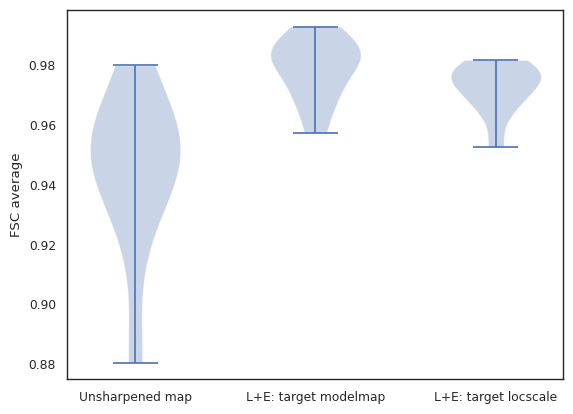

In [11]:

# Plot fsc unsharpened versus fsc emmernet output (masked) for each EMDB-PDB pair
fsc_unsharpened_masked = [np.mean(fsc_training_target_modelmap[emdb_pdb]['fsc_unsharpened_masked']) for emdb_pdb in fsc_training_target_modelmap]
fsc_unsharpened_masked_2 = [np.mean(fsc_training_target_locscale[emdb_pdb]['fsc_unsharpened_masked']) for emdb_pdb in fsc_training_target_locscale]

fsc_locscale_using_emmernet_as_reference = [np.mean(fsc_training_target_modelmap[emdb_pdb]['fsc_emmernet_output_masked']) for emdb_pdb in fsc_training_target_modelmap]
fsc_emmernet_output = [np.mean(fsc_training_target_locscale[emdb_pdb]['fsc_emmernet_output_masked']) for emdb_pdb in fsc_training_target_locscale]

plt.violinplot([fsc_unsharpened_masked, fsc_locscale_using_emmernet_as_reference, fsc_emmernet_output])
plt.xticks([1,2,3], ["Unsharpened map", "L+E: target modelmap", "L+E: target locscale"])
plt.ylabel("FSC average")




Not significant difference
pvalue:  0.26977302269773024
stars:  ns


Text(0, 0.5, 'FSC average (wilson)')

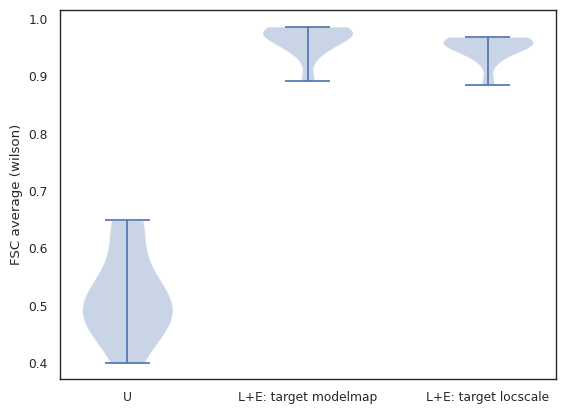

In [35]:

fsc_unsharpened_masked_wilson = [np.mean(fsc_training_target_modelmap[emdb_pdb]['fsc_unsharpened_map_wilson']) for emdb_pdb in fsc_training_target_modelmap]
fsc_locscale_using_emmernet_ref_wilson = [np.mean(fsc_training_target_modelmap[emdb_pdb]['fsc_emmernet_output_map_wilson']) for emdb_pdb in fsc_training_target_modelmap]
fsc_emmernet_output_wilson = [np.mean(fsc_training_target_locscale[emdb_pdb]['fsc_emmernet_output_map_wilson']) for emdb_pdb in fsc_training_target_locscale]

list_of_series = [fsc_unsharpened_masked_wilson, fsc_locscale_using_emmernet_ref_wilson, fsc_emmernet_output_wilson]
pvalue_masked_wilson = calculate_significance(*list_of_series[1:])
xticks = ["U", "L+E: target modelmap", "L+E: target locscale"]
ylabel = 'FSC average (wilson)'
ylims = [0,1.2]
yticks = [0.5, 1]
kwargs = {'figsize_cm':(3,3), 'fontscale':1, 'font':'Helvetica', 'linewidth':0.5, 'ylims':ylims, 'yticks':yticks}

#fig_fsc_wilson = pretty_violinplots(list_of_series, xticks, ylabel, **kwargs)
plt.violinplot(list_of_series)
plt.xticks([1,2,3], xticks)
plt.ylabel(ylabel)



Text(0, 0.5, 'RSCC with target map')

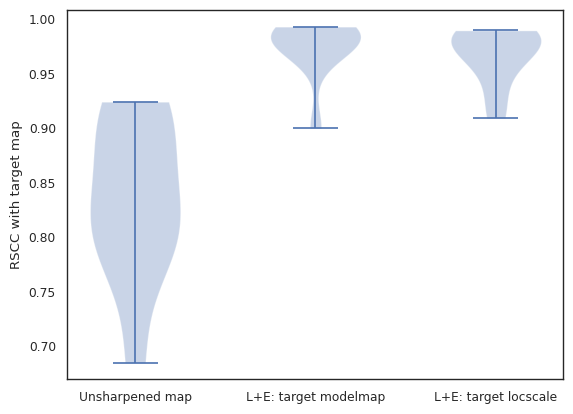

In [15]:

rscc_unsharpene_masked = [np.mean(rscc_training_target_locscale[emdb_pdb]['rsc_unsharpened_map']) for emdb_pdb in rscc_training_target_locscale]
rscc_locscale_using_emmernet_as_reference = [np.mean(rscc_training_target_locscale[emdb_pdb]['rsc_emmernet_output_map']) for emdb_pdb in rscc_training_target_locscale]
rscc_data_training_target_locscale = [np.mean(rscc_training_target_modelmap[emdb_pdb]['rsc_emmernet_output_map']) for emdb_pdb in rscc_training_target_modelmap]

plt.violinplot([rscc_unsharpene_masked, rscc_locscale_using_emmernet_as_reference, rscc_data_training_target_locscale])
plt.xticks([1,2,3], ["Unsharpened map", "L+E: target modelmap", "L+E: target locscale"])
plt.ylabel("RSCC with target map")

